In [51]:
import glob
import os
from pprint import pprint
import re

import pandas as pd
import matplotlib.pyplot as plt

In [7]:
results_dir = "../domain_shift_results"

In [17]:
files = []

for expt in os.listdir(results_dir):
    wc = os.path.join(results_dir, expt, "**", "**_full.csv")
    full_results = glob.glob(wc)
    if full_results:
        most_recent_result = full_results[-1]
        print(f"got recent result file for expt {expt}: {most_recent_result}")
        files.append(most_recent_result)

got recent result file for expt anes_year: ../domain_shift_results/anes_year/20230101185210/tune_results_anes_year_20230101185210_full.csv
got recent result file for expt acsfoodstamps_region: ../domain_shift_results/acsfoodstamps_region/20230106161313/tune_results_acsfoodstamps_region_20230106161313_full.csv
got recent result file for expt brfss_diabetes_race: ../domain_shift_results/brfss_diabetes_race/20230109204618/tune_results_brfss_diabetes_race_20230109204618_full.csv
got recent result file for expt acsincome_region: ../domain_shift_results/acsincome_region/20230106160753/tune_results_acsincome_region_20230106160753_full.csv
got recent result file for expt anes_region: ../domain_shift_results/anes_region/20230110133535/tune_results_anes_region_20230110133535_full.csv
got recent result file for expt nhanes_lead_poverty: ../domain_shift_results/nhanes_lead_poverty/20230109205342/tune_results_nhanes_lead_poverty_20230109205342_full.csv
got recent result file for expt mimic_extract_

In [37]:
dfs = []
for f in files:
    df = pd.read_csv(f)
    task = re.search(".*/domain_shift_results/(\w+)/.*", f).group(1)
    df["task"] = task
    dfs.append(df)

In [42]:
df = pd.concat(dfs)
df.head()

,train-auc,train-map,validation-auc,validation-map,id_test-auc,id_test-map,ood_test-auc,ood_test-map,ood_validation-auc,ood_validation-map,...,domain_split_id_values,train-average_precision,validation-average_precision,id_test-average_precision,ood_test-average_precision,ood_validation-average_precision,config/params/min_child_samples,config/params/reg_alpha,config/params/reg_lambda,task
0,0.859967,0.902029,0.881125,0.925866,0.872542,0.919961,0.894500,0.934414,0.902139,0.939591,...,"[1948, 1952, 1954, 1956, 1958, 1960, 1962, 196...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anes_year
1,0.805127,0.856644,0.823616,0.882994,0.811675,0.870999,0.852571,0.905029,0.841470,0.905356,...,"[1948, 1952, 1954, 1956, 1958, 1960, 1962, 196...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anes_year
2,0.747346,0.829408,0.708851,0.825744,0.709987,0.826910,0.681453,0.824842,0.663097,0.827163,...,"[1948, 1952, 1954, 1956, 1958, 1960, 1962, 196...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anes_year
3,0.802530,0.855615,0.814410,0.878067,0.800995,0.866320,0.853459,0.909304,0.875131,0.928597,...,"[1948, 1952, 1954, 1956, 1958, 1960, 1962, 196...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anes_year
4,0.675308,0.779708,0.668050,0.789081,0.669585,0.795185,0.665199,0.798295,0.669186,0.807106,...,"[1948, 1952, 1954, 1956, 1958, 1960, 1962, 196...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anes_year


In [43]:
print(sorted(df.columns))

['config/params/alpha', 'config/params/colsample_bylevel', 'config/params/colsample_bytree', 'config/params/gamma', 'config/params/lambda', 'config/params/learning_rate', 'config/params/max_bin', 'config/params/max_depth', 'config/params/min_child_samples', 'config/params/min_child_weight', 'config/params/reg_alpha', 'config/params/reg_lambda', 'config/params/subsample', 'date', 'domain_split_id_values', 'domain_split_ood_values', 'domain_split_varname', 'done', 'episodes_total', 'estimator', 'experiment_id', 'hostname', 'id_test-auc', 'id_test-average_precision', 'id_test-map', 'id_test_accuracy', 'iterations_since_restore', 'logdir', 'node_ip', 'ood_test-auc', 'ood_test-average_precision', 'ood_test-map', 'ood_test_accuracy', 'ood_validation-auc', 'ood_validation-average_precision', 'ood_validation-map', 'ood_validation_accuracy', 'pid', 'task', 'time_since_restore', 'time_this_iter_s', 'time_total_s', 'timestamp', 'timesteps_since_restore', 'timesteps_total', 'train-auc', 'train-ave

In [75]:
best_acc_per_task = df.loc[df.groupby(['task', 'estimator'])['validation_accuracy'].idxmax()]
best_acc_per_task[['validation_accuracy', 'task', 'estimator']].sort_values(["task", "validation_accuracy", "estimator"])

,validation_accuracy,task,estimator
568,0.805822,acsfoodstamps_region,lightgbm
756,0.807250,acsfoodstamps_region,lightgbm
342,0.807782,acsfoodstamps_region,lightgbm
194,0.813702,acsfoodstamps_region,lightgbm
100,0.813702,acsfoodstamps_region,lightgbm
...,...,...,...
261,0.978701,physionet_set,xgb
367,0.978714,physionet_set,lightgbm
244,0.978714,physionet_set,xgb
342,0.978779,physionet_set,lightgbm


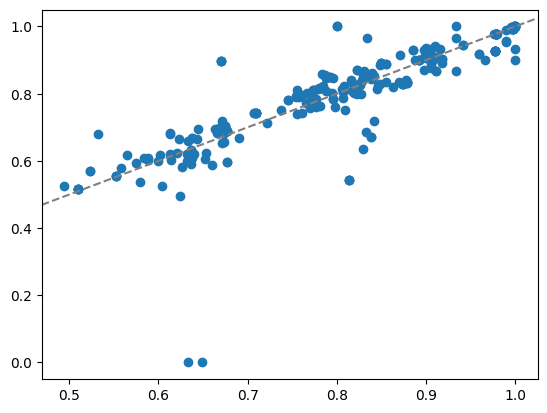

In [60]:
plt.scatter(best_acc_per_task['validation_accuracy'].values, best_acc_per_task['ood_validation_accuracy'].values)
plt.axline((0.5,0.5), (1, 1), linestyle="dashed", color="grey")

In [69]:
for task in sorted(best_acc_per_task.task.unique()):
    for est in sorted(best_acc_per_task.estimator.unique()):
        df_ = best_acc_per_task.query(f"estimator == '{est}' and task == '{task}'")
        print(df_[['validation_accuracy', 'task', 'estimator']])
        break

      validation_accuracy                  task estimator
1508             0.846598  acsfoodstamps_region  lightgbm
568              0.805822  acsfoodstamps_region  lightgbm
367              0.839950  acsfoodstamps_region  lightgbm
790              0.840433  acsfoodstamps_region  lightgbm
194              0.813702  acsfoodstamps_region  lightgbm
156              0.841969  acsfoodstamps_region  lightgbm
1370             0.844557  acsfoodstamps_region  lightgbm
756              0.807250  acsfoodstamps_region  lightgbm
702              0.838741  acsfoodstamps_region  lightgbm
309              0.839913  acsfoodstamps_region  lightgbm
100              0.813702  acsfoodstamps_region  lightgbm
100              0.813702  acsfoodstamps_region  lightgbm
342              0.807782  acsfoodstamps_region  lightgbm
      validation_accuracy              task estimator
1508             0.671328  acsincome_region  lightgbm
568              0.822193  acsincome_region  lightgbm
367              0.676486 

In [73]:
x = best_acc_per_task
x.query(f"estimator == '{est}' and task == '{task}'")[['validation_accuracy', 'task', 'estimator']]

,validation_accuracy,task,estimator
367,0.978714,physionet_set,lightgbm
194,0.978677,physionet_set,lightgbm
156,0.976664,physionet_set,lightgbm
309,0.978084,physionet_set,lightgbm
100,0.978677,physionet_set,lightgbm
100,0.978677,physionet_set,lightgbm
342,0.978779,physionet_set,lightgbm
